<a href="https://colab.research.google.com/github/max-barker/AINT515/blob/main/Labs/Practical%2005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical 05: Blob Detection**

---

**Introduction**

What is a blob? In computer vision a blob is a group of locally connected pixels that share a common property, such as colour or brightness. Typically blob detection is used to make sense of a colour image after thresholding. Given an image with lots of green objects for example, thesholding can isolate objects of that colour, but blob detection can tell you more about the positions, sizes, and shapes of those objects.

The detector can filter the types of blobs its looking for by computing five properties:


*   **Area:** The number of pixels contained in a blob.
*   **Threshold:** The range of brightness values a pixel can have inside of a blob
*   **Circularity:** How close the blob is to a perfect circle. Circles have a circularity of 1.0, Squares are 0.79, and so on. Mathematically it is defined as: *(4 * Pi * Area)/(Perimeter)^2*
*   **Inertia:** How elongated a blob is. A circle has an inertia of 1 and a line has an inertia of 0.
*   **Convexity:** Imagine stretching an elastic band around a shape, the new shape the elastic band takes is known as the convex hull of the original shape. Convexity is defined as the ratio of the area to the area of the convex hull. A circle (or any other convex polygon) has a convexity of 1, where as a "U" shape has a lower convexity.

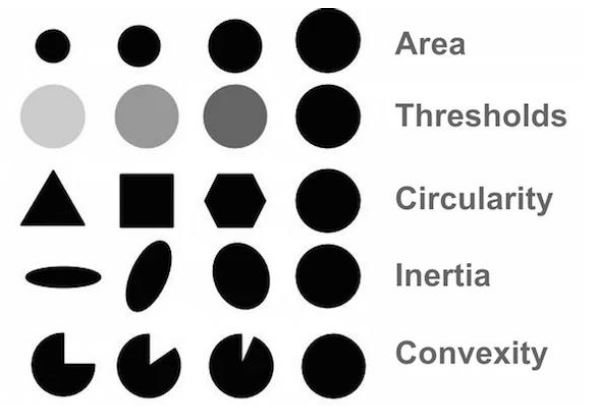





In [ ]:
import cv2 as cv   #opencv itself (under the name cv)
import numpy as np #numpy math library (under the name np)
import math

#image displaying libraries
import pylab       
from matplotlib import pyplot as plt 

#make generated images appear inline below the code
%matplotlib inline 

#set the displayed image size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) 

# Download example images
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/ec4579ed20025521bd20c9a2cf29e53d9557958c/AINT515/Practical05/Blob-Detection-1.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/ec4579ed20025521bd20c9a2cf29e53d9557958c/AINT515/Practical05/Blob-Detection-2.jpg
!wget https://raw.githubusercontent.com/Jamesrogers221194/AINT-Files/ec4579ed20025521bd20c9a2cf29e53d9557958c/AINT515/Practical05/Blob-Detection-3.jpg

There are three example images in this practical, consisting of red shapes of varying sizes on a white background.

In [ ]:
input_image=cv.imread('Blob-Detection-1.jpg')                 #import the image as a Mat
input_image_RGB = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)  #convert the image to an RGB format so it can be displayed correctly
plt.imshow(input_image_RGB)                                   #plot the image

The code below thresholds the image to detect red pixels, then filters to clean up the result. The output is also inverted, as the default blob detection is set up to find darker pixels on a white background.

In [ ]:
#threshold image to detect just red pixels
threshold_image = cv.inRange(input_image_RGB, (230, 0, 0), (255, 50, 50))

#filter image to clean up edges
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11)) 
threshold_image = cv.dilate(threshold_image,kernel,iterations = 1)
threshold_image = cv.erode(threshold_image,kernel,iterations = 1)  

#invert image as the blob detector is coded to find darker blobs on a lighter background
threshold_image = cv.bitwise_not(threshold_image)

#show image
plt.imshow(threshold_image)

This runs and displays the blob detector. The first step to setting up the detector is to define its parameters. Such as what blob properties to filter out and which to ignore. The settings given to you filter on circularity alone, specifically the circularity value of a square. More parameter settings can be found [here](https://docs.opencv.org/3.4/d8/da7/structcv_1_1SimpleBlobDetector_1_1Params.html).

The blob detection library also comes with a drawing function called "drawKeypoints()". This is used to draw markers on the original image to show what blobs were detected.

In [ ]:
#blob detector parameters (set to find squares)
params = cv.SimpleBlobDetector_Params()
params.filterByArea = False
params.filterByConvexity = False
params.filterByInertia = False
params.filterByCircularity = True
params.minCircularity = 0.7
params.maxCircularity = 0.85

#create the detector and use it to find blobs in the thresholded image
detector = cv.SimpleBlobDetector_create(params)
blobs = detector.detect(threshold_image)

#draw detected blobs to the colour image
input_image_RGB_blobs = cv.drawKeypoints(input_image_RGB, blobs, np.array([]), (0,0,255), cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
#show image
plt.imshow(input_image_RGB_blobs)

Try changing the parameters to achieve different results. Isolate some of the other shapes, or just a particular size. Can you set up more detectors to colour each type of shape a differently?